# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression, LassoCV, Ridge, LogisticRegression, BayesianRidge, TweedieRegressor, SGDClassifier 
from sklearn.svm import SVR


from sklearn import tree
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import *

# DataFrame, Data et Variables

In [2]:
df = pd.read_csv('logicimmo - Copie.csv')
X = df.drop('Prix (Euros)', axis = 1)
y = df['Prix (Euros)']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [4]:
MAE_list = []
RMSE_list = []
median_abs_err_list = []
model_list = []
score_list = []
mean_error_list = []
r2_list = []
max_error_list = []
variance_list = []
percentage_error_list = []

# Modèles  :

### Regression linéaire 

In [5]:
model_lin_reg = LinearRegression()
model_lin_reg.fit(X_train,y_train)
score_lin_reg = model_lin_reg.score(X_test,y_test)
score_list.append(score_lin_reg)
score_lin_reg

0.8360242421258803

In [6]:
cross_val_score(model_lin_reg, X, y, cv=3)

array([0.77157965, 0.74653845, 0.87778059])

In [7]:
linear_selector = SelectFromModel(LinearRegression(),threshold='mean')
linear_selector.fit_transform(X,y)
linear_selector.get_support()

array([ True,  True,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False])

In [8]:
y_pred = model_lin_reg.predict(X_test)
print('MAE : ', mean_absolute_error(y_test,y_pred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('median absolut error : ', median_absolute_error(y_test, y_pred))
print('R2 score : ', r2_score(y_test, y_pred))
print('Max error : ', max_error(y_test, y_pred))
print('Explained variance : ', explained_variance_score(y_test, y_pred))
print('mean abs percentage error : ', mean_absolute_percentage_error(y_test, y_pred))

MAE :  152031.26320866373
RMSE :  341957.4524866711
median absolut error :  79264.86794869229
R2 score :  0.8360242421258803
Max error :  5087472.217366643
Explained variance :  0.8360538479305899
mean abs percentage error :  0.2819763062628874


In [9]:
MAE_list.append(mean_absolute_error(y_test,y_pred))
RMSE_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
median_abs_err_list.append(median_absolute_error(y_test, y_pred))
r2_list.append(r2_score(y_test, y_pred))
max_error_list.append(max_error(y_test, y_pred))
variance_list.append(explained_variance_score(y_test, y_pred))
percentage_error_list.append(mean_absolute_percentage_error(y_test, y_pred))
model_list.append("Regression \nLineaire")

<function matplotlib.pyplot.show(close=None, block=None)>

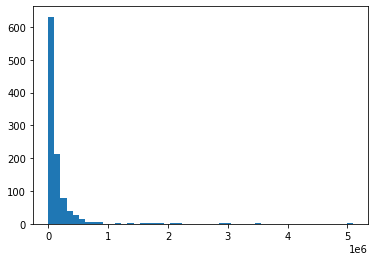

In [10]:
error_hist = np.abs(y_test - y_pred)
mean_error_list.append(error_hist.mean())
plt.hist(error_hist, bins=50)
plt.show

In [11]:
cross_val_score(model_lin_reg, X, y, cv=3, scoring='neg_mean_absolute_error')

array([-135178.37501722, -170745.47305594, -136788.6594032 ])

### Lasso CV

In [12]:
model_lasso_cv = LassoCV(cv=5)
model_lasso_cv.fit(X_train, y_train)
score_lasso_cv = model_lasso_cv.score(X_test, y_test)
score_list.append(score_lasso_cv)
score_lasso_cv

0.8199201249526349

In [13]:
cross_val_score(model_lasso_cv, X, y, cv=3)

array([0.77343558, 0.72604868, 0.87479024])

In [14]:
lasso_selector = SelectFromModel(LassoCV(cv=3),threshold='mean')
lasso_selector.fit_transform(X,y)
lasso_selector.get_support()

array([ True,  True,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False])

In [15]:
y_pred = model_lasso_cv.predict(X_test)
print('MAE : ', mean_absolute_error(y_test,y_pred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('median absolut error : ', median_absolute_error(y_test, y_pred))
print('R2 score : ', r2_score(y_test, y_pred))
print('Max error : ', max_error(y_test, y_pred))
print('Explained variance : ', explained_variance_score(y_test, y_pred))
print('mean abs percentage error : ', mean_absolute_percentage_error(y_test, y_pred))

MAE :  153870.05961367517
RMSE :  358356.13170178054
median absolut error :  77698.67896656506
R2 score :  0.8199201249526349
Max error :  5346640.3146283515
Explained variance :  0.8199418539877452
mean abs percentage error :  0.28797670953475113


In [16]:
MAE_list.append(mean_absolute_error(y_test,y_pred))
RMSE_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
median_abs_err_list.append(median_absolute_error(y_test, y_pred))
r2_list.append(r2_score(y_test, y_pred))
max_error_list.append(max_error(y_test, y_pred))
variance_list.append(explained_variance_score(y_test, y_pred))
percentage_error_list.append(mean_absolute_percentage_error(y_test, y_pred))
model_list.append("Lasso CV")

<function matplotlib.pyplot.show(close=None, block=None)>

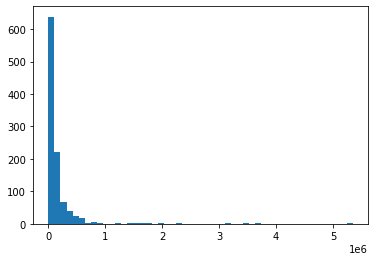

In [17]:
error_hist = np.abs(y_test - y_pred)
mean_error_list.append(error_hist.mean())
plt.hist(error_hist, bins=50)
plt.show

In [18]:
cross_val_score(model_lasso_cv, X, y, cv=3, scoring='neg_mean_absolute_error')

array([-127883.0567458 , -179212.86875154, -135654.47631235])

### Ridge

In [19]:
model_ridge = Ridge()
model_ridge.fit(X_train, y_train)
score_ridge = model_ridge.score(X_test, y_test)
score_list.append(score_ridge)
score_ridge

0.8360285272005877

In [20]:
cross_val_score(model_ridge, X, y, cv=3)

array([0.77159686, 0.74653367, 0.87782159])

In [21]:
Ridge_selector = SelectFromModel(Ridge(),threshold='mean')
Ridge_selector.fit_transform(X,y)
Ridge_selector.get_support()

array([ True,  True,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False])

In [22]:
y_pred = model_ridge.predict(X_test)
print('MAE : ', mean_absolute_error(y_test,y_pred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('median absolut error : ', median_absolute_error(y_test, y_pred))
print('R2 score : ', r2_score(y_test, y_pred))
print('Max error : ', max_error(y_test, y_pred))
print('Explained variance : ', explained_variance_score(y_test, y_pred))
print('mean abs percentage error : ', mean_absolute_percentage_error(y_test, y_pred))

MAE :  152029.58048848645
RMSE :  341952.98437863233
median absolut error :  79317.54278009385
R2 score :  0.8360285272005877
Max error :  5087715.2317556515
Explained variance :  0.8360581449781543
mean abs percentage error :  0.28194926702810263


In [23]:
MAE_list.append(mean_absolute_error(y_test,y_pred))
RMSE_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
median_abs_err_list.append(median_absolute_error(y_test, y_pred))
r2_list.append(r2_score(y_test, y_pred))
max_error_list.append(max_error(y_test, y_pred))
variance_list.append(explained_variance_score(y_test, y_pred))
percentage_error_list.append(mean_absolute_percentage_error(y_test, y_pred))
model_list.append("Ridge")

<function matplotlib.pyplot.show(close=None, block=None)>

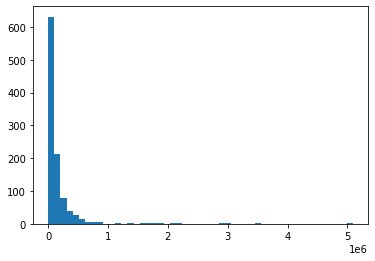

In [24]:
error_hist = np.abs(y_test - y_pred)
mean_error_list.append(error_hist.mean())
plt.hist(error_hist, bins=50)
plt.show

In [25]:
cross_val_score(model_ridge, X, y, cv=3, scoring='neg_mean_absolute_error')

array([-135160.50845741, -170744.17440316, -136767.29962109])

### SVR

In [26]:
#model_SVR = SVR(kernel='rbf')
#model_SVR.fit(X_train,y_train)
#model_SVR.score(X_test,y_test)
#score trop faible, process long -> inutile

### SGDClassifier

In [27]:
#model_SGD = SGDClassifier(max_iter=1000, tol=0.01)
#model_SGD.fit(X_train,y_train)
#model_SGD.score(X_test,y_test)

### LogisticRegression

In [28]:
#model_logistic_reg = LogisticRegression()
#model_logistic_reg.fit(X_train,y_train)
#model_logistic_reg.score(X_test,y_test)

### BayesianRidge

In [29]:
model_bayesian = BayesianRidge()
model_bayesian.fit(X_train, y_train)
score_bayesian = model_bayesian.score(X_test, y_test)
score_list.append(score_bayesian)
score_bayesian

0.8361377309110525

In [30]:
cross_val_score(model_bayesian, X, y, cv=3)

array([0.77225466, 0.74620571, 0.87888785])

In [31]:
selector_bayesian = SelectFromModel(BayesianRidge(),threshold='mean')
selector_bayesian.fit_transform(X,y)
selector_bayesian.get_support()

array([ True,  True,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False])

In [32]:
y_pred = model_bayesian.predict(X_test)
print('MAE : ', mean_absolute_error(y_test,y_pred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('median absolut error : ', median_absolute_error(y_test, y_pred))
print('R2 score : ', r2_score(y_test, y_pred))
print('Max error : ', max_error(y_test, y_pred))
print('Explained variance : ', explained_variance_score(y_test, y_pred))
print('mean abs percentage error : ', mean_absolute_percentage_error(y_test, y_pred))

MAE :  151870.76493937703
RMSE :  341839.0964151019
median absolut error :  80138.3383275643
R2 score :  0.8361377309110525
Max error :  5100971.986046612
Explained variance :  0.8361675966466349
mean abs percentage error :  0.28048395772942847


In [33]:
MAE_list.append(mean_absolute_error(y_test,y_pred))
RMSE_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
median_abs_err_list.append(median_absolute_error(y_test, y_pred))
r2_list.append(r2_score(y_test, y_pred))
max_error_list.append(max_error(y_test, y_pred))
variance_list.append(explained_variance_score(y_test, y_pred))
percentage_error_list.append(mean_absolute_percentage_error(y_test, y_pred))
model_list.append("Bayesian \nRidge")

<function matplotlib.pyplot.show(close=None, block=None)>

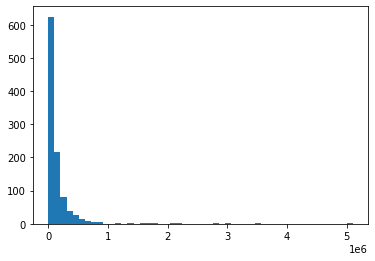

In [34]:
error_hist = np.abs(y_test - y_pred)
mean_error_list.append(error_hist.mean())
plt.hist(error_hist, bins=50)
plt.show

In [35]:
cross_val_score(model_bayesian, X, y, cv=3, scoring='neg_mean_absolute_error')

array([-134519.24144298, -170714.11358434, -136160.20716938])

### TweedieRegressor

In [36]:
model_tweedie = TweedieRegressor(max_iter=1000)
model_tweedie.fit(X_train, y_train)
score_tweedie = model_tweedie.score(X_test, y_test)
score_list.append(score_tweedie)
score_tweedie

0.8216839520544194

In [37]:
cross_val_score(model_tweedie, X, y, cv=3)

array([0.77655909, 0.72832354, 0.87312597])

In [38]:
selector_tweedie = SelectFromModel(TweedieRegressor(max_iter=1000),threshold='mean')
selector_tweedie.fit_transform(X,y)
selector_tweedie.get_support()

array([ True,  True,  True, False, False, False,  True, False, False,
       False, False,  True, False, False, False, False])

In [39]:
y_pred = model_tweedie.predict(X_test)
print('MAE : ', mean_absolute_error(y_test,y_pred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('median absolut error : ', median_absolute_error(y_test, y_pred))
print('R2 score : ', r2_score(y_test, y_pred))
print('Max error : ', max_error(y_test, y_pred))
print('Explained variance : ', explained_variance_score(y_test, y_pred))
print('mean abs percentage error : ', mean_absolute_percentage_error(y_test, y_pred))

MAE :  154124.26950746682
RMSE :  356596.8189613802
median absolut error :  76352.45758748904
R2 score :  0.8216839520544194
Max error :  5348801.528555356
Explained variance :  0.8216995043556231
mean abs percentage error :  0.27204234147193423


In [40]:
MAE_list.append(mean_absolute_error(y_test,y_pred))
RMSE_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
median_abs_err_list.append(median_absolute_error(y_test, y_pred))
r2_list.append(r2_score(y_test, y_pred))
max_error_list.append(max_error(y_test, y_pred))
variance_list.append(explained_variance_score(y_test, y_pred))
percentage_error_list.append(mean_absolute_percentage_error(y_test, y_pred))
model_list.append("Tweedie \nRegressor")

<function matplotlib.pyplot.show(close=None, block=None)>

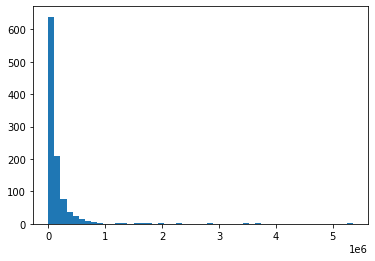

In [41]:
error_hist = np.abs(y_test - y_pred)
mean_error_list.append(error_hist.mean())
plt.hist(error_hist, bins=50)
plt.show

In [42]:
cross_val_score(model_tweedie, X, y, cv=3, scoring='neg_mean_absolute_error')

array([-126922.70592305, -177977.36936342, -138245.11617789])

# Comparaisons des modèles

### Résultats :

#### Précision 

Text(0, 0.5, 'Accuracy')

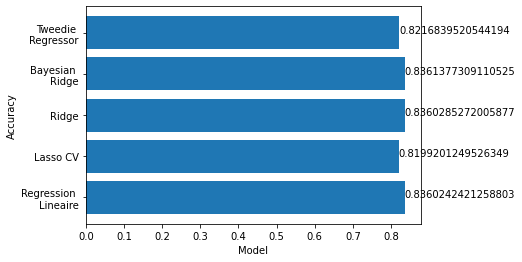

In [43]:
plt.barh(model_list, score_list)
for index, value in enumerate(score_list):
    plt.text(value, index, str(value))
plt.xlabel('Model')
plt.ylabel('Accuracy')

### Erreurs : 

Text(0, 0.5, 'Mean error')

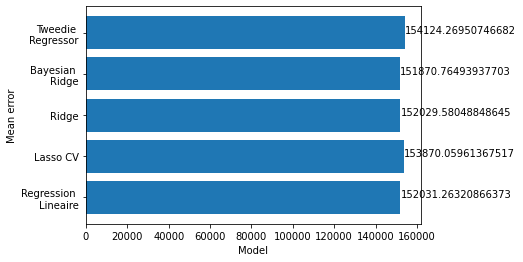

In [44]:
plt.barh(model_list, mean_error_list)
for index, value in enumerate(mean_error_list):
    plt.text(value, index, str(value))
plt.xlabel('Model')
plt.ylabel('Mean error')

Text(0, 0.5, 'MAE')

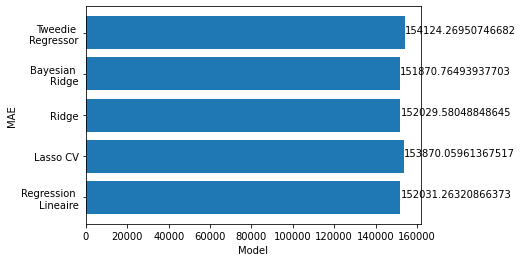

In [45]:
plt.barh(model_list, MAE_list)
for index, value in enumerate(MAE_list):
    plt.text(value, index, str(value))
plt.xlabel('Model')
plt.ylabel('MAE')

Text(0, 0.5, 'RMSE')

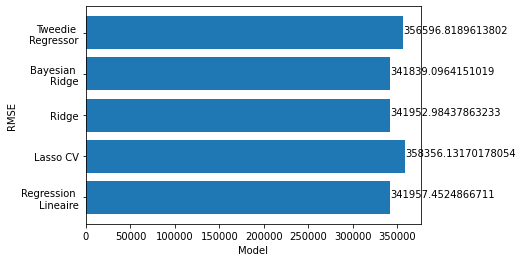

In [46]:
plt.barh(model_list, RMSE_list)
for index, value in enumerate(RMSE_list):
    plt.text(value, index, str(value))
plt.xlabel('Model')
plt.ylabel('RMSE')

Text(0, 0.5, 'Median Abs Error')

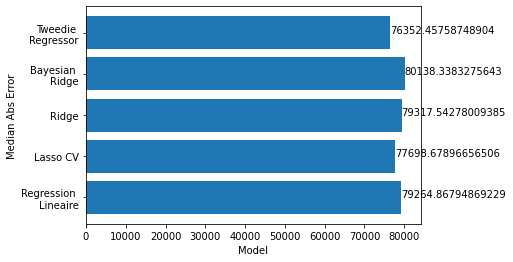

In [47]:
plt.barh(model_list, median_abs_err_list)
for index, value in enumerate(median_abs_err_list):
    plt.text(value, index, str(value))
plt.xlabel('Model')
plt.ylabel('Median Abs Error')

Text(0, 0.5, 'r2 score')

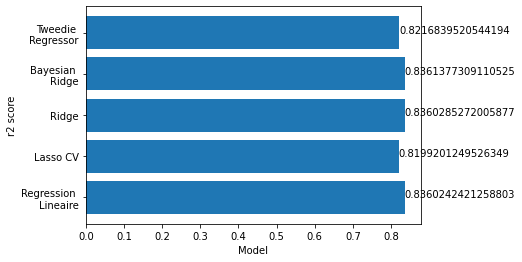

In [48]:
plt.barh(model_list, r2_list)
for index, value in enumerate(r2_list):
    plt.text(value, index, str(value))
plt.xlabel('Model')
plt.ylabel('r2 score')

Text(0, 0.5, 'Max Error')

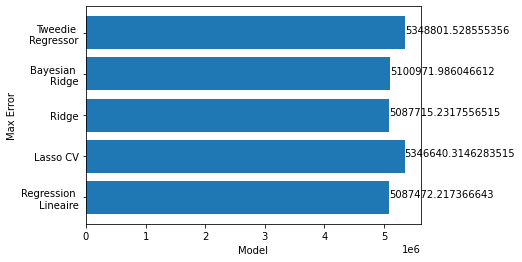

In [49]:
plt.barh(model_list, max_error_list)
for index, value in enumerate(max_error_list):
    plt.text(value, index, str(value))
plt.xlabel('Model')
plt.ylabel('Max Error')

Text(0, 0.5, 'Explained Variance Score')

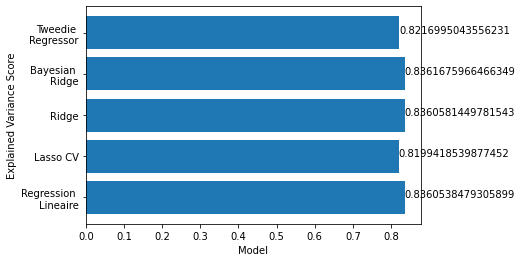

In [50]:
plt.barh(model_list, variance_list)
for index, value in enumerate(variance_list):
    plt.text(value, index, str(value))
plt.xlabel('Model')
plt.ylabel('Explained Variance Score')

Text(0, 0.5, 'Mean Abs Percentage Error')

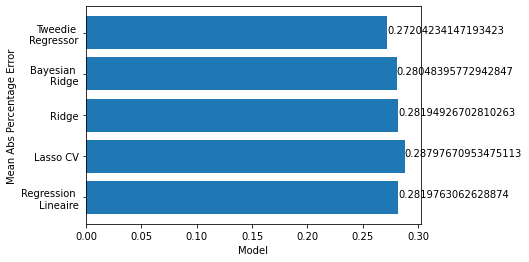

In [51]:
plt.barh(model_list, percentage_error_list)
for index, value in enumerate(percentage_error_list):
    plt.text(value, index, str(value))
plt.xlabel('Model')
plt.ylabel('Mean Abs Percentage Error')

### Features : 

In [52]:
df.head()

,Superficie (m2),Nombre Pieces,Nombre Chambres,Prix (Euros),Code Postal,Classe Energetique,Nombre Photos,Etage,Type de Bien,Type Vendeur,Terrasse,Parking,Cave,Ascenseur,Gardien,Renove,Box
0,64,3,2,830000,75017,5,1,3,1,1,-1,-1,-1,-1,-1,-1,-1
1,122,5,5,1470000,75015,0,10,3,1,1,1,1,1,1,-1,-1,1
2,5,1,0,65000,75116,5,6,6,1,1,-1,-1,-1,1,1,1,-1
3,7,1,0,80000,75015,0,4,7,1,1,-1,-1,-1,-1,1,-1,-1
4,8,1,0,87000,75006,0,4,6,1,1,-1,-1,-1,1,1,-1,-1


In [91]:
df[['Code Postal','Prix (Euros)', 'Superficie (m2)']]

,Code Postal,Prix (Euros),Superficie (m2)
0,75017,830000,64
1,75015,1470000,122
2,75116,65000,5
3,75015,80000,7
4,75006,87000,8
...,...,...,...
5151,75015,240000,16
5152,75011,240000,22
5153,75009,240000,0
5154,75016,240000,16


In [54]:
print(df["Code Postal"].value_counts())
print(df.groupby('Code Postal')['Prix (Euros)'].mean())

75018    641
75015    542
75017    457
75016    356
75019    346
75020    335
75011    294
75014    282
75010    267
75013    265
75012    223
75009    181
75007    166
75008    142
75006    135
75005    122
75003     99
75004     96
75002     81
75116     75
75001     51
Name: Code Postal, dtype: int64
Code Postal
75001    9.001314e+05
75002    5.287049e+05
75003    8.346677e+05
75004    8.086822e+05
75005    5.969873e+05
75006    9.359901e+05
75007    1.341716e+06
75008    1.526422e+06
75009    7.078613e+05
75010    4.541537e+05
75011    4.523510e+05
75012    4.492317e+05
75013    4.583168e+05
75014    5.146743e+05
75015    5.331625e+05
75016    8.187319e+05
75017    5.701865e+05
75018    3.929556e+05
75019    4.305811e+05
75020    4.013520e+05
75116    1.585651e+06
Name: Prix (Euros), dtype: float64


In [55]:
print(df["Superficie (m2)"].value_counts())
print(df.groupby('Superficie (m2)')['Prix (Euros)'].mean())

38     136
18     122
36     117
42     116
8      107
      ... 
234      1
167      1
191      1
207      1
460      1
Name: Superficie (m2), Length: 232, dtype: int64
Superficie (m2)
0      3.306821e+05
5      6.220833e+04
6      6.961028e+04
7      8.612788e+04
8      8.968505e+04
           ...     
343    5.000000e+06
393    9.000000e+06
416    9.375000e+06
417    9.900000e+06
460    6.500000e+06
Name: Prix (Euros), Length: 232, dtype: float64


In [56]:
print(df["Nombre Pieces"].value_counts())
print(df.groupby('Nombre Pieces')['Prix (Euros)'].mean())

1    1807
2    1729
3     826
4     389
5     241
6     104
7      43
8      16
9       1
Name: Nombre Pieces, dtype: int64
Nombre Pieces
1    2.360460e+05
2    4.351077e+05
3    7.321619e+05
4    1.188376e+06
5    1.766525e+06
6    2.537125e+06
7    2.908506e+06
8    4.286250e+06
9    2.950000e+06
Name: Prix (Euros), dtype: float64


In [57]:
print(df["Nombre Chambres"].value_counts())
print(df.groupby('Nombre Chambres')['Prix (Euros)'].mean())

1    1869
0    1808
2     894
3     386
4     155
5      36
6       7
8       1
Name: Nombre Chambres, dtype: int64
Nombre Chambres
0    2.263572e+05
1    4.625808e+05
2    8.788953e+05
3    1.608067e+06
4    2.088253e+06
5    2.754493e+06
6    2.798571e+06
8    9.375000e+06
Name: Prix (Euros), dtype: float64


In [58]:
print(df["Classe Energetique"].value_counts())
print(df.groupby('Classe Energetique')['Prix (Euros)'].mean())

0    1773
5    1045
4     882
7     592
6     565
3     231
2      37
1      31
Name: Classe Energetique, dtype: int64
Classe Energetique
0    5.740742e+05
1    5.277629e+05
2    1.609062e+06
3    9.255952e+05
4    8.352301e+05
5    6.033470e+05
6    4.616431e+05
7    3.319739e+05
Name: Prix (Euros), dtype: float64


In [59]:
print(df["Nombre Photos"].value_counts())
print(df.groupby('Nombre Photos')['Prix (Euros)'].mean())

10    1810
6      557
7      529
8      522
9      496
5      429
4      348
3      212
1      133
2       98
0       22
Name: Nombre Photos, dtype: int64
Nombre Photos
0     575933.636364
1     468545.406015
2     460616.806122
3     305119.674528
4     334904.965517
5     352236.505828
6     433708.736086
7     435348.642722
8     500714.674330
9     619665.429435
10    905523.644199
Name: Prix (Euros), dtype: float64


In [60]:
print(df["Etage"].value_counts())
print(df.groupby('Etage')['Prix (Euros)'].mean())

 1    943
-1    893
 2    776
 3    675
 4    552
 6    525
 5    432
 7    256
 8     79
 9     25
Name: Etage, dtype: int64
Etage
-1    542669.108623
 1    599112.244963
 2    669194.319588
 3    717765.074074
 4    677237.128623
 5    753055.988426
 6    407597.754286
 7    368857.781250
 8    689422.025316
 9    667239.200000
Name: Prix (Euros), dtype: float64


In [61]:
print(df["Terrasse"].value_counts())
print(df.groupby('Terrasse')['Prix (Euros)'].mean())

-1    4410
 1     746
Name: Terrasse, dtype: int64
Terrasse
-1    568231.700227
 1    839366.749330
Name: Prix (Euros), dtype: float64


In [62]:
print(df["Parking"].value_counts())
print(df.groupby('Parking')['Prix (Euros)'].mean())

-1    4882
 1     274
Name: Parking, dtype: int64
Parking
-1    593648.938140
 1    853559.405109
Name: Prix (Euros), dtype: float64


In [63]:
print(df["Cave"].value_counts())
print(df.groupby('Cave')['Prix (Euros)'].mean())

-1    2787
 1    2369
Name: Cave, dtype: int64
Cave
-1    527426.451381
 1    701617.506543
Name: Prix (Euros), dtype: float64


In [64]:
print(df["Ascenseur"].value_counts())
print(df.groupby('Ascenseur')['Prix (Euros)'].mean())

-1    3234
 1    1922
Name: Ascenseur, dtype: int64
Ascenseur
-1    513086.389610
 1    766258.069199
Name: Prix (Euros), dtype: float64


In [65]:
print(df["Gardien"].value_counts())
print(df.groupby('Gardien')['Prix (Euros)'].mean())

-1    4014
 1    1142
Name: Gardien, dtype: int64
Gardien
-1    569760.076233
 1    739975.873030
Name: Prix (Euros), dtype: float64


In [66]:
print(df["Renove"].value_counts())
print(df.groupby('Renove')['Prix (Euros)'].mean())

-1    4882
 1     274
Name: Renove, dtype: int64
Renove
-1    604539.160795
 1    659522.664234
Name: Prix (Euros), dtype: float64


In [67]:
print(df["Box"].value_counts())
print(df.groupby('Box')['Prix (Euros)'].mean())

-1    5152
 1       4
Name: Box, dtype: int64
Box
-1    607220.767275
 1    917000.000000
Name: Prix (Euros), dtype: float64


### Les prix trop élevés affectent les métriques

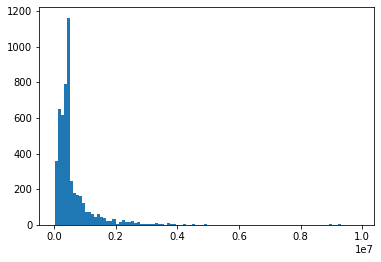

In [97]:
plt.hist(y, bins=100)
plt.show()

In [69]:
print(max(y))

9900000


Text(0, 0.5, 'prix')

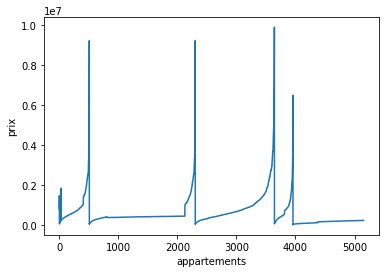

In [70]:
ax = df['Prix (Euros)'].plot()
ax.set_xlabel("appartements")
ax.set_ylabel("prix")

In [72]:
val = []
for i in y :
    if i > 6000000 :
        val.append(i)
print(len(val))
print(val)

12
[9000000, 9225000, 9000000, 9225000, 6300000, 6400000, 6600000, 6950000, 7290000, 9375000, 9900000, 6500000]


In [99]:
df.sort_values(by=['Prix (Euros)'], ascending=False).head(15)

,Superficie (m2),Nombre Pieces,Nombre Chambres,Prix (Euros),Code Postal,Classe Energetique,Nombre Photos,Etage,Type de Bien,Type Vendeur,Terrasse,Parking,Cave,Ascenseur,Gardien,Renove,Box
3643,417,6,4,9900000,75016,5,10,2,1,1,-1,-1,-1,-1,-1,-1,-1
3642,416,1,8,9375000,75116,0,10,8,1,1,-1,-1,-1,1,-1,-1,-1
508,254,6,3,9225000,75008,2,10,7,1,1,-1,-1,1,-1,-1,-1,-1
2302,254,6,3,9225000,75008,2,10,7,1,1,-1,-1,-1,1,-1,-1,-1
507,393,8,3,9000000,75116,0,10,5,1,1,1,-1,-1,1,-1,-1,-1
2301,393,8,3,9000000,75116,0,10,5,1,1,-1,-1,-1,1,-1,-1,-1
3641,265,6,2,7290000,75116,5,4,3,1,1,-1,-1,-1,-1,-1,-1,-1
3640,274,7,4,6950000,75007,4,10,-1,1,1,-1,-1,-1,-1,-1,-1,-1
3639,187,4,2,6600000,75008,0,10,8,1,1,-1,-1,-1,1,-1,-1,-1
3957,460,8,5,6500000,75116,0,0,3,1,1,-1,-1,-1,-1,-1,-1,-1
